In [ ]:
!pip install requests && pip install tabulate && pip install "colorama>=0.3.8" && pip install future


In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o


Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [ ]:
min_mem_size = 6; run_time = 222


In [ ]:
!pip install psutil

In [ ]:
import psutil  # Make sure to import psutil

pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)


2


In [ ]:
import random
import logging
import sys
import h2o
import psutil

logging.basicConfig(level=logging.INFO)

pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))

port_no = random.randint(5555, 55555)

try:
    h2o.init(strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no)
except Exception as e:
    logging.critical('Failed to initialize h2o: {}'.format(e))

    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)



Checking whether there is an H2O instance running at http://localhost:6982..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprvabed82
  JVM stdout: /tmp/tmprvabed82/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmprvabed82/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:6982
Connecting to H2O server at http://127.0.0.1:6982 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_j9fovm
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
!pip install h2o
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

In [ ]:
import pandas as pd
import seaborn as sns


<ipython-input-117-20267cfb8bd4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_no.corr(),annot=True)


<Axes: >

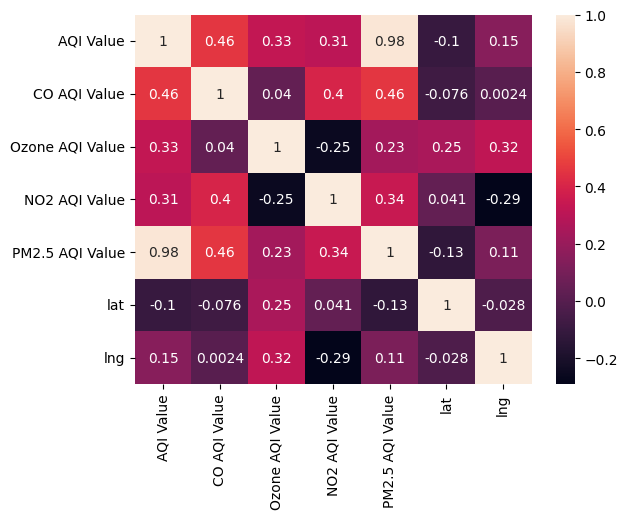

In [ ]:
data_no= pd.read_csv( '/content/AQI and Lat Long of Countries.csv' )
sns.heatmap(data_no.corr(),annot=True)

In [ ]:
data_no.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [ ]:
h2o.init(strict_version_check=False)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 12 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_g0cb85
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.043 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

In [ ]:
data_h = h2o.import_file( '/content/AQI and Lat Long of Countries.csv' )


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
data_no.isnull().sum()


Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

In [ ]:
data_no = data_no.dropna(subset=['Country'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder_country = LabelEncoder()
data_no['Country'] = label_encoder_country.fit_transform(data_no['Country'])

# Label encoding for 'City'
label_encoder_city = LabelEncoder()
data_no['City'] = label_encoder_city.fit_transform(data_no['City'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data_no['AQI Category'] = LE.fit_transform(data_no['AQI Category'])
data_no['CO AQI Category'] = LE.fit_transform(data_no['CO AQI Category'])
data_no['Ozone AQI Category'] = LE.fit_transform(data_no['Ozone AQI Category'])
data_no['PM2.5 AQI Category'] = LE.fit_transform(data_no['PM2.5 AQI Category'])
data_no['NO2 AQI Category'] = LE.fit_transform(data_no['NO2 AQI Category'])

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Select only numerical columns for normalization
numerical_columns = data_no.select_dtypes(include=['int64', 'float64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the numerical columns and transform the data
data_no[numerical_columns] = scaler.fit_transform(data_no[numerical_columns])

# 'data_no' has the normalized features in the range [0, 1]



In [ ]:
!pip install statsmodels



In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


# Apply log transformation to the variables where it makes sense and where all values are positive
log_vars = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
for var in log_vars:
    if (data_no[var] <= 0).any():
        print(f"Cannot perform log transform on {var} because it contains non-positive values.")
    else:
        data_no['log_' + var] = np.log(data_no[var])

X_columns = ['Country', 'City', 'AQI Category', 'CO AQI Category', 'Ozone AQI Category',
             'NO2 AQI Category', 'lat', 'lng']
for var in log_vars:
    X_columns.append('log_' + var if 'log_' + var in data_no else var)

X = data_no[X_columns]

X = sm.add_constant(X)

y = data_no['AQI Value']

model = sm.OLS(y, X).fit()

print(model.summary())


Cannot perform log transform on CO AQI Value because it contains non-positive values.
Cannot perform log transform on Ozone AQI Value because it contains non-positive values.
Cannot perform log transform on NO2 AQI Value because it contains non-positive values.
Cannot perform log transform on PM2.5 AQI Value because it contains non-positive values.
                            OLS Regression Results                            
Dep. Variable:              AQI Value   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 4.880e+04
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:19:15   Log-Likelihood:                 46156.
No. Observations:               16393   AIC:                        -9.229e+04
Df Residuals:                   16380   BIC:                        -9.219e+04
Df Model:        

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


for var in ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'lat', 'lng']:
    data_no[var + '_squared'] = data_no[var] ** 2

# Defining independent variables including the polynomial terms
X = data_no[['Country', 'City', 'AQI Category', 'CO AQI Value', 'CO AQI Category',
        'Ozone AQI Value', 'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category',
        'PM2.5 AQI Value', 'lat', 'lng',
        'CO AQI Value_squared', 'Ozone AQI Value_squared', 'NO2 AQI Value_squared',
        'PM2.5 AQI Value_squared', 'lat_squared', 'lng_squared']]

X = sm.add_constant(X)

y = data_no['AQI Value']

# Fit the OLS model with the independent variables
model = sm.OLS(y, X).fit()

# Print out the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              AQI Value   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 4.252e+04
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:08:05   Log-Likelihood:                 48301.
No. Observations:               16393   AIC:                        -9.656e+04
Df Residuals:                   16374   BIC:                        -9.642e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

In [ ]:
features_to_drop = [
    'CO AQI Category', 'Ozone AQI Value', 'PM2.5 AQI Value',
    'lat', 'CO AQI Value_squared', 'lat_squared'
]

data_no.drop(columns=features_to_drop, inplace=True)



In [ ]:
data_no.drop(columns=['lng_squared'], inplace=True)


In [ ]:
rows, columns = data_no.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 16393
Number of columns: 14


In [ ]:
data_no = data_no.drop(columns=['PM2.5 AQI Category'])


In [ ]:
data_no.corr()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,lat,lng
Country,1.000000,0.001385,-0.077590,-0.024832,-0.006728,0.014891,-0.067971,-0.145514,0.245784,-0.008613,-0.070524,0.277280,-0.328749
City,0.001385,1.000000,-0.002855,-0.009050,-0.005494,-0.011087,0.017122,0.008149,0.018423,-0.009785,-0.009740,0.027263,0.053998
AQI Value,-0.077590,-0.002855,1.000000,0.689964,0.458529,0.138424,0.328959,0.404370,0.308275,0.164559,0.980604,-0.101673,0.155514
AQI Category,-0.024832,-0.009050,0.689964,1.000000,0.272764,0.003692,0.196105,0.321740,0.347898,0.035345,0.711436,-0.100886,0.050579
CO AQI Value,-0.006728,-0.005494,0.458529,0.272764,1.000000,0.775540,0.039960,0.129952,0.398974,0.513684,0.458980,-0.077734,0.003489
CO AQI Category,0.014891,-0.011087,0.138424,0.003692,0.775540,1.000000,-0.001279,0.015902,0.107397,0.501578,0.136671,0.000094,-0.008522
Ozone AQI Value,-0.067971,0.017122,0.328959,0.196105,0.039960,-0.001279,1.000000,0.816485,-0.252301,-0.029810,0.234705,0.247768,0.323898
Ozone AQI Category,-0.145514,0.008149,0.404370,0.321740,0.129952,0.015902,0.816485,1.000000,-0.066159,-0.006194,0.330132,0.014743,0.243363
NO2 AQI Value,0.245784,0.018423,0.308275,0.347898,0.398974,0.107397,-0.252301,-0.066159,1.000000,0.248522,0.340821,0.038933,-0.290050
NO2 AQI Category,-0.008613,-0.009785,0.164559,0.035345,0.513684,0.501578,-0.029810,-0.006194,0.248522,1.000000,0.165809,-0.007895,0.019495


# **1. Is the relationship significant?**

P-values (P>|t|): These tell us whether the relationships between each independent variable and the dependent variable are statistically significant. For a typical alpha level of 0.05, p-values below this threshold suggest that the variable has a statistically significant relationship with the dependent variable.

several variables have p-values significantly less than 0.05, indicating they have a statistically significant relationship with the dependent variable, "AQI Value." These variables include "City," "AQI Category," "CO AQI Value," "CO AQI Category," "Ozone AQI Value," "Ozone AQI Category," "PM2.5 AQI Value, and "lng."

The F-statistic is quite large, and the Prob (F-statistic) is 0.00, which is less than 0.05, indicating that the overall regression relationship is statistically significant.




In [ ]:
import statsmodels.api as sm

model = sm.OLS(data_no['AQI Value'], data_no[['Country', 'City', 'AQI Category', 'CO AQI Value',
       'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'lng',
       'Ozone AQI Value_squared', 'NO2 AQI Value_squared',
       'PM2.5 AQI Value_squared']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              AQI Value   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                          5.453e+04
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                        0.00
Time:                        03:26:09   Log-Likelihood:                          38247.
No. Observations:               16393   AIC:                                 -7.647e+04
Df Residuals:                   16382   BIC:                                 -7.639e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Country                     0.0194      0.001     37.623      0.000       0.018       0.020
City                        0.0134      0.001     22.591      0.000       0.012       0.015
AQI Category                0.1275      0.001    147.066      0.000       0.126       0.129
CO AQI Value                0.0109      0.014      0.780      0.436      -0.016       0.038
Ozone AQI Category         -0.0181      0.003     -5.727      0.000      -0.024      -0.012
NO2 AQI Value               0.1745      0.007     25.596      0.000       0.161       0.188
NO2 AQI Category           -0.0882      0.011     -8.367      0.000      -0.109      -0.068
lng                         0.0506      0.001     71.870      0.000       0.049       0.052
Ozone AQI Value_squared     0.1734      0.005     37.232      0.000       0.164       0.183
NO2 AQI Value_squared      -0.2621      0.021    -12.551      0.000      -0.303      -0.221
PM2.5 AQI Value_squared     1.2357      0.004    275.255      0.000       1.227       1.244
==============================================================================
Omnibus:                     6073.978   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           383328.448
Skew:                          -0.954   Prob(JB):                         0.00
Kurtosis:                      26.613   Cond. No.                         123.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#2. Are any model assumptions violated?

Residuals vs. Fitted Plot: This plot checks for non-linearity and  homoscedasticity. so no violation is taking place.

As for Q-Q, outliers are important for this dataset, so i cannot remove them.



In [ ]:
data_no.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'lng',
       'Ozone AQI Value_squared', 'NO2 AQI Value_squared',
       'PM2.5 AQI Value_squared'],
      dtype='object')

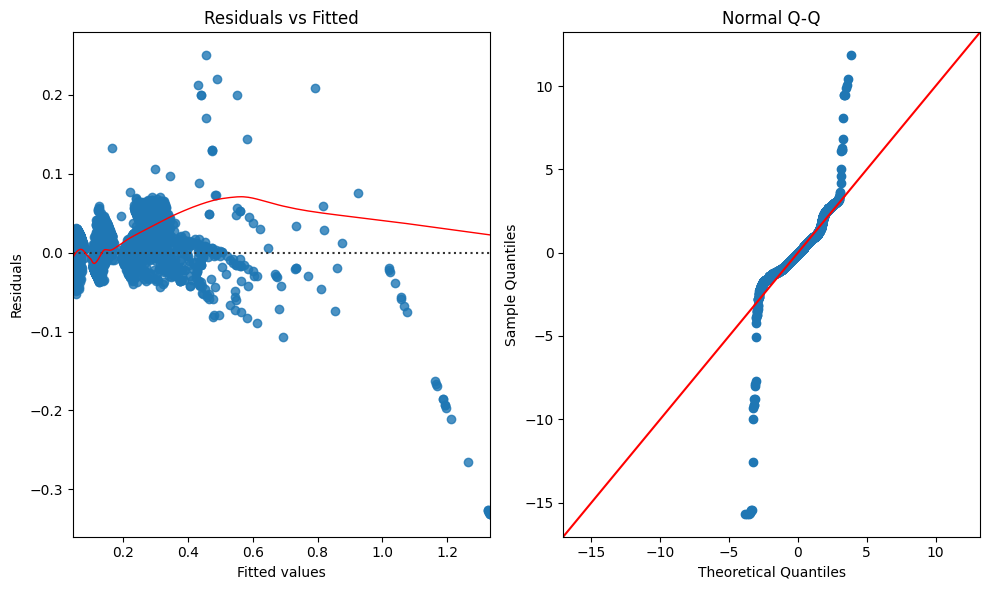

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

X = data_no[['Country', 'City', 'AQI Category', 'CO AQI Value',
       'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'lng',
       'Ozone AQI Value_squared', 'NO2 AQI Value_squared',
       'PM2.5 AQI Value_squared']]
y = data_no['AQI Value']

# Add a constant to the predictor variable set to include an intercept in the model
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Get the model's predictions
predictions = model.predict(X)

# Calculate the residuals
residuals = y - predictions

# Plotting the residuals
plt.figure(figsize=(10, 6))

# Residual plot
plt.subplot(1, 2, 1)
sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# QQ plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45', fit=True, ax=plt.gca())
plt.title('Normal Q-Q')

plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

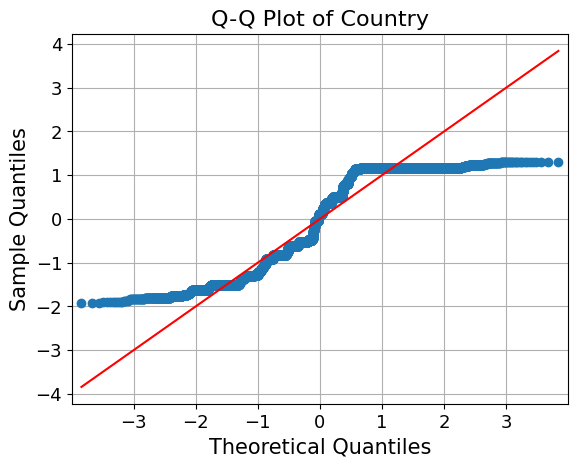

<Figure size 800x500 with 0 Axes>

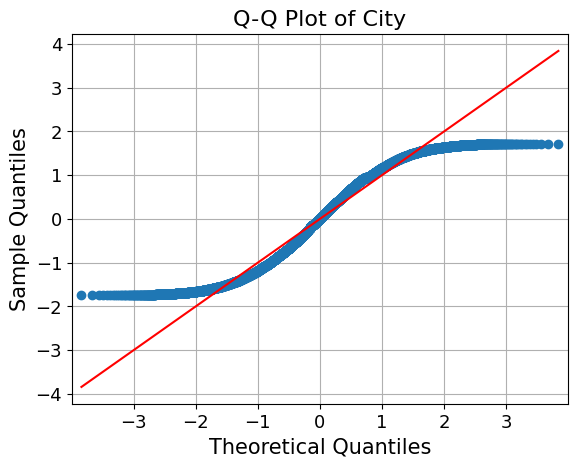

<Figure size 800x500 with 0 Axes>

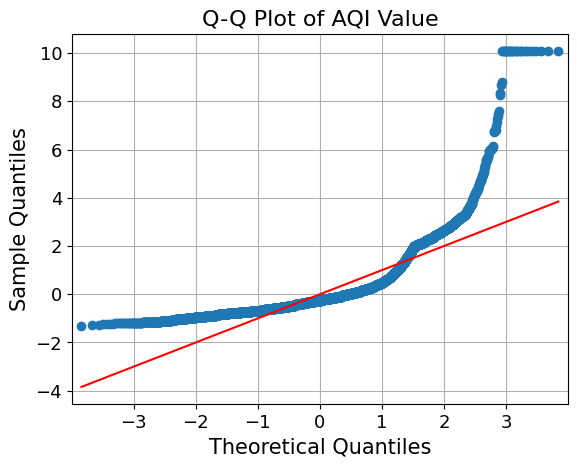

<Figure size 800x500 with 0 Axes>

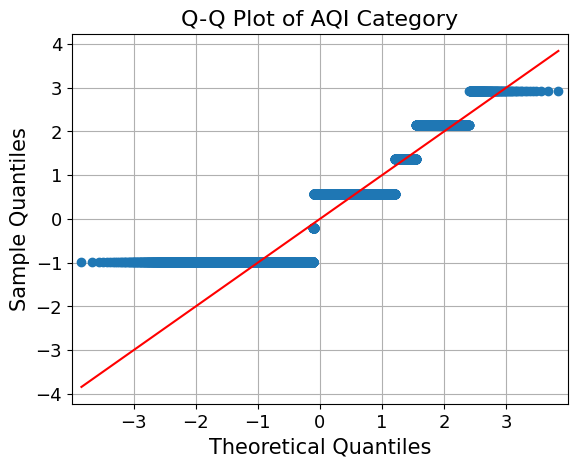

<Figure size 800x500 with 0 Axes>

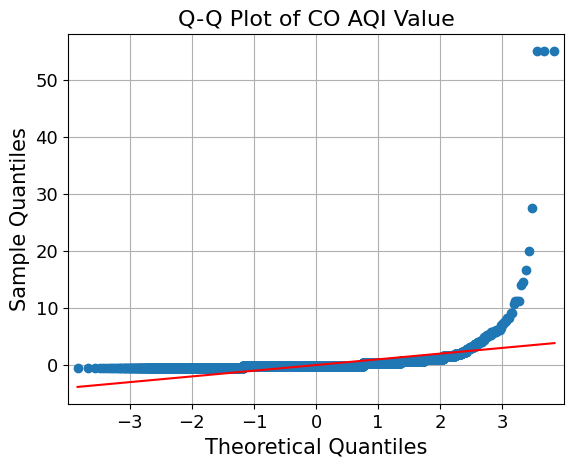

<Figure size 800x500 with 0 Axes>

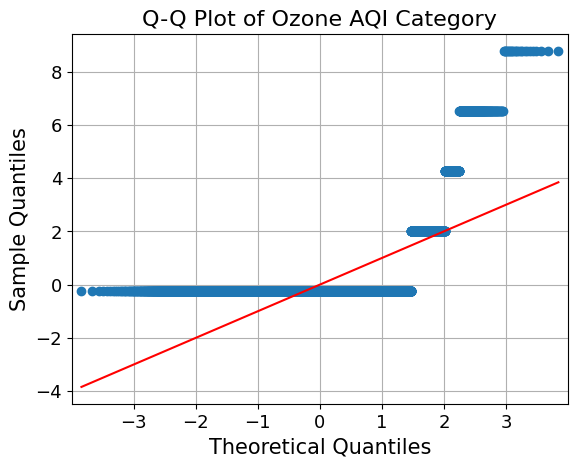

<Figure size 800x500 with 0 Axes>

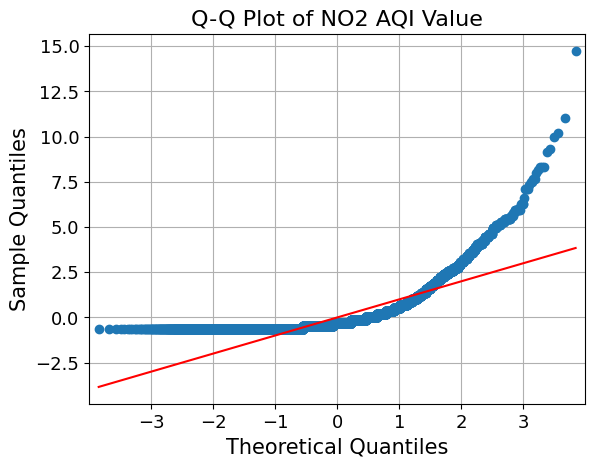

<Figure size 800x500 with 0 Axes>

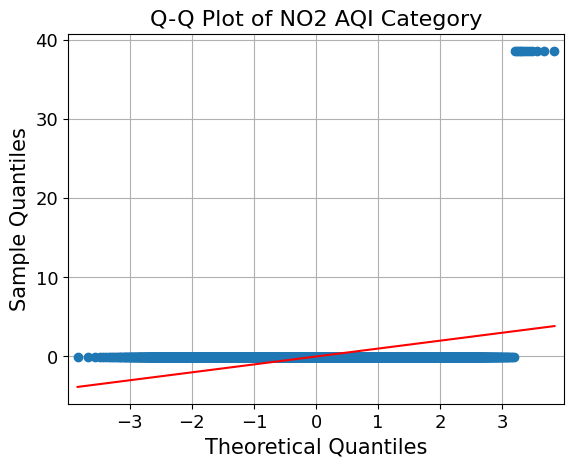

<Figure size 800x500 with 0 Axes>

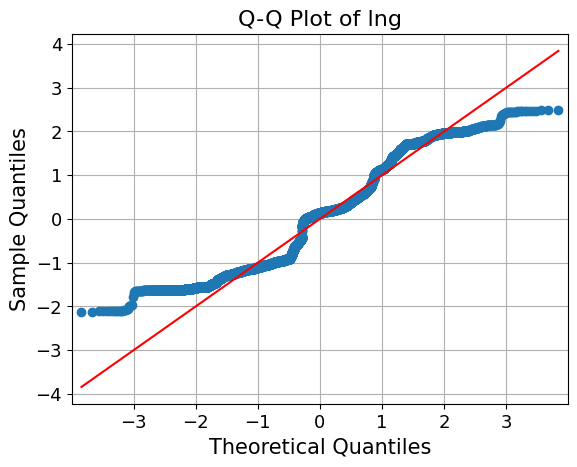

<Figure size 800x500 with 0 Axes>

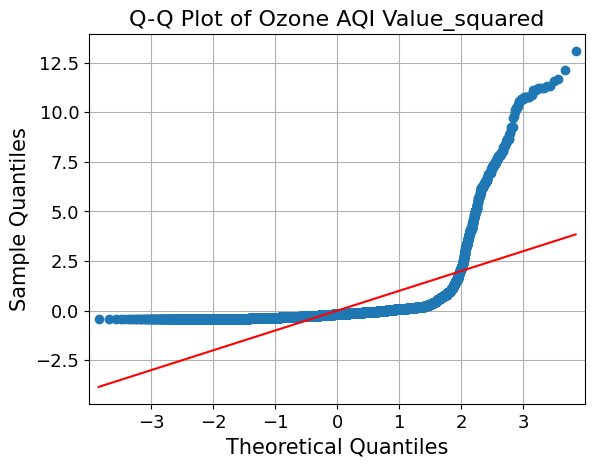

<Figure size 800x500 with 0 Axes>

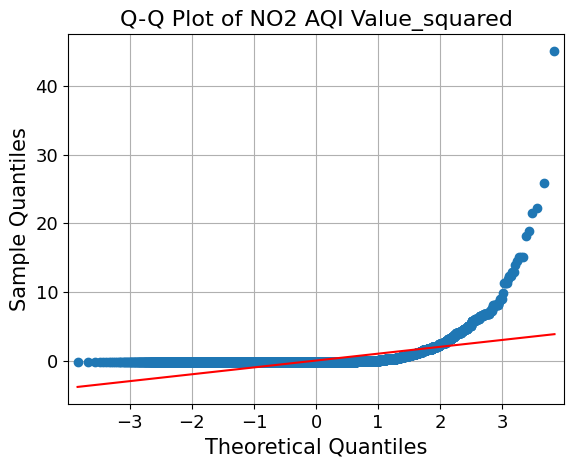

<Figure size 800x500 with 0 Axes>

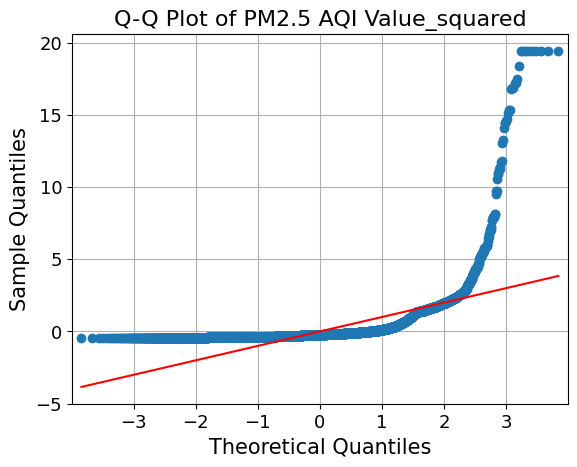

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import pandas as pd
for column in data_h.columns:
    # Check if the column is numeric to avoid attempting Q-Q plots on categorical data
    if pd.api.types.is_numeric_dtype(data_no[column]):
        # Create a new figure for each column
        plt.figure(figsize=(8, 5))

        # Generate the Q-Q plot for the column
        qqplot(data_no[column], line='s', fit=True)  # 's' for standardized line

        # Customize the plot
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.xlabel("Theoretical Quantiles", fontsize=15)
        plt.ylabel("Sample Quantiles", fontsize=15)
        plt.title(f"Q-Q Plot of {column}", fontsize=16)
        plt.grid(True)

        # Display the plot
        plt.show()


#3. Is there any multicollinearity in the model?

No, as we can see from the VIF, no value is above 10.


#4. In the multivariate models, are predictor variables independent of all the other predictor variables?

As we can see the VIF is less than 10, there is no major dependence with other predictor variable





In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


predictors = data_no.drop(columns=['AQI Value'])

predictors_with_const = add_constant(predictors)

vif_data_no = pd.DataFrame()

vif_data_no["Variable"] = predictors_with_const.columns

# Calculate VIF for each variable and add it to the DataFrame
vif_data_no["VIF"] = [variance_inflation_factor(predictors_with_const.values, i) for i in range(predictors_with_const.shape[1])]

# Display the VIF DataFrame
print(vif_data_no)


                   Variable        VIF
0                     const  17.758443
1                   Country   1.179536
2                      City   1.006026
3              AQI Category   1.484754
4              CO AQI Value   1.876426
5        Ozone AQI Category   3.659611
6             NO2 AQI Value   6.107121
7          NO2 AQI Category   2.222659
8                       lng   1.316631
9   Ozone AQI Value_squared   3.537540
10    NO2 AQI Value_squared   6.539141
11  PM2.5 AQI Value_squared   1.520800


# Training and Testing

In [ ]:
data_h = h2o.H2OFrame(data_no)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
from sklearn.model_selection import train_test_split

X = data_no.drop(['AQI Value'], axis=1)
y = data_no['AQI Value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

Variables with a Ranking of 1:

AQI Category,
CO AQI Category,
Ozone AQI Category,
NO2 AQI Category,
PM2.5 AQI Value

Variables with a Ranking of 2 and above:

CO AQI Value (Rank 2),
Ozone AQI Value (Rank 3),
NO2 AQI Value (Rank 4),
lng (Rank 5),
Country (Rank 6),
City (Rank 7)

I cannot remove the least ranking ones cause they have p values less than 0.05.



In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)  # Adjust n_features_to_select as needed
fit = rfe.fit(X_train, y_train)

# Display the ranking of features
feature_ranking = pd.DataFrame({'Feature': X_train.columns, 'Ranking': fit.ranking_})
feature_ranking = feature_ranking.sort_values(by='Ranking')

print(feature_ranking)


                    Feature  Ranking
2              AQI Category        1
5             NO2 AQI Value        1
6          NO2 AQI Category        1
8   Ozone AQI Value_squared        1
10  PM2.5 AQI Value_squared        1
3              CO AQI Value        2
9     NO2 AQI Value_squared        3
7                       lng        4
4        Ozone AQI Category        5
0                   Country        6
1                      City        7


# H20.ai initialization

In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Convert the train and test sets to H2O Frames
h2o_train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
h2o_test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Define the target and features for the H2O AutoML
target = 'AQI Value'
features = [col for col in X.columns]


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,6 hours 48 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_g0cb85
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.987 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


#  Does the model make sense?

Yes, as we can see below, all the models make sense as the rmse value is low.
But according to the leaderboard the best model is XGBoost


In [ ]:
automl = H2OAutoML(max_models=20, seed=1, max_runtime_secs=600, project_name='AQI_Prediction_Project')
automl.train(x=features, y=target, training_frame=h2o_train)

# View the AutoML Leaderboard
lb = automl.leaderboard
print(lb.head(rows=lb.nrows))  # Print all rows instead of default (10 rows)


AutoML progress: |
03:30:57.845: New models will be added to existing leaderboard AQI_Prediction_Project@@AQI_Value (leaderboard frame=null) with already 17 models.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                               rmse           mse          mae       rmsle    mean_residual_deviance
XGBoost_grid_2_AutoML_4_20240220_33057_model_3   0.00385147   1.48338e-05  0.000742582  0.00239833               1.48338e-05
GBM_8_AutoML_4_20240220_33057                    0.00386634   1.49486e-05  0.00131236   0.00259651               1.49486e-05
GBM_grid_2_AutoML_4_20240220_33057_model_2       0.00389414   1.51643e-05  0.00139439   0.00260526               1.51643e-05
GBM_7_AutoML_4_20240220_33057                    0.00391482   1.53258e-05  0.00140535   0.00266727               1.53258e-05
GBM_10_AutoML_4_20240220_33057                   0.00409484   1.67677e-05  0.000951318  0.00256875               1.67677e-05
GBM_9_A

In [ ]:
# Predict on the test set using the best model
predictions = automl.leader.predict(h2o_test[features])

# Evaluate model performance
performance = automl.leader.model_performance(h2o_test)
print(performance)


xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 9.354341882834043e-06
RMSE: 0.0030584868616415606
MAE: 0.0007143986301900511
RMSLE: 0.0018153547288283325
Mean Residual Deviance: 9.354341882834043e-06


# 7. Does regularization help?

No, regularization does not help



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn import metrics


data_no['AQI Category'] = data_no['AQI Category']
data_no['Ozone AQI Category'] = data_no['Ozone AQI Category']
data_no['NO2 AQI Category'] = data_no['NO2 AQI Category']

# Selecting features and target variable
X = data_no[['Country', 'City', 'AQI Category', 'CO AQI Value',
       'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'lng',
       'Ozone AQI Value_squared', 'NO2 AQI Value_squared',
       'PM2.5 AQI Value_squared']]

y = data_no['AQI Value']

# Pipeline with Ridge regression
pipeline = Pipeline([
    ('ridge', Ridge(fit_intercept=True, alpha=0.5))
])

# Splitting data into Training 70%, Test set 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Fit the model
pipeline.fit(X_train, y_train)

# RMSE after regularization
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("RMSE after regularization:", rmse)


RMSE after regularization: 0.020420375250333637


# 8. Which independent variables are significant?

Based on the bar plot, here are the top features in descending order of importance:

AQI Category: This feature has the highest importance, indicating it is the most significant predictor in the model.

PM2.5 AQI Value_squared: The squared term of PM2.5 AQI Value, which suggests that the relationship between PM2.5 AQI Value and the target variable might be non-linear.

Ozone AQI Value_squared: Similarly, a squared term suggests a non-linear relationship.

Ozone AQI Category: The category of Ozone AQI is also an important feature.
CO AQI Value: The value of CO AQI contributes significantly to the model's predictions.



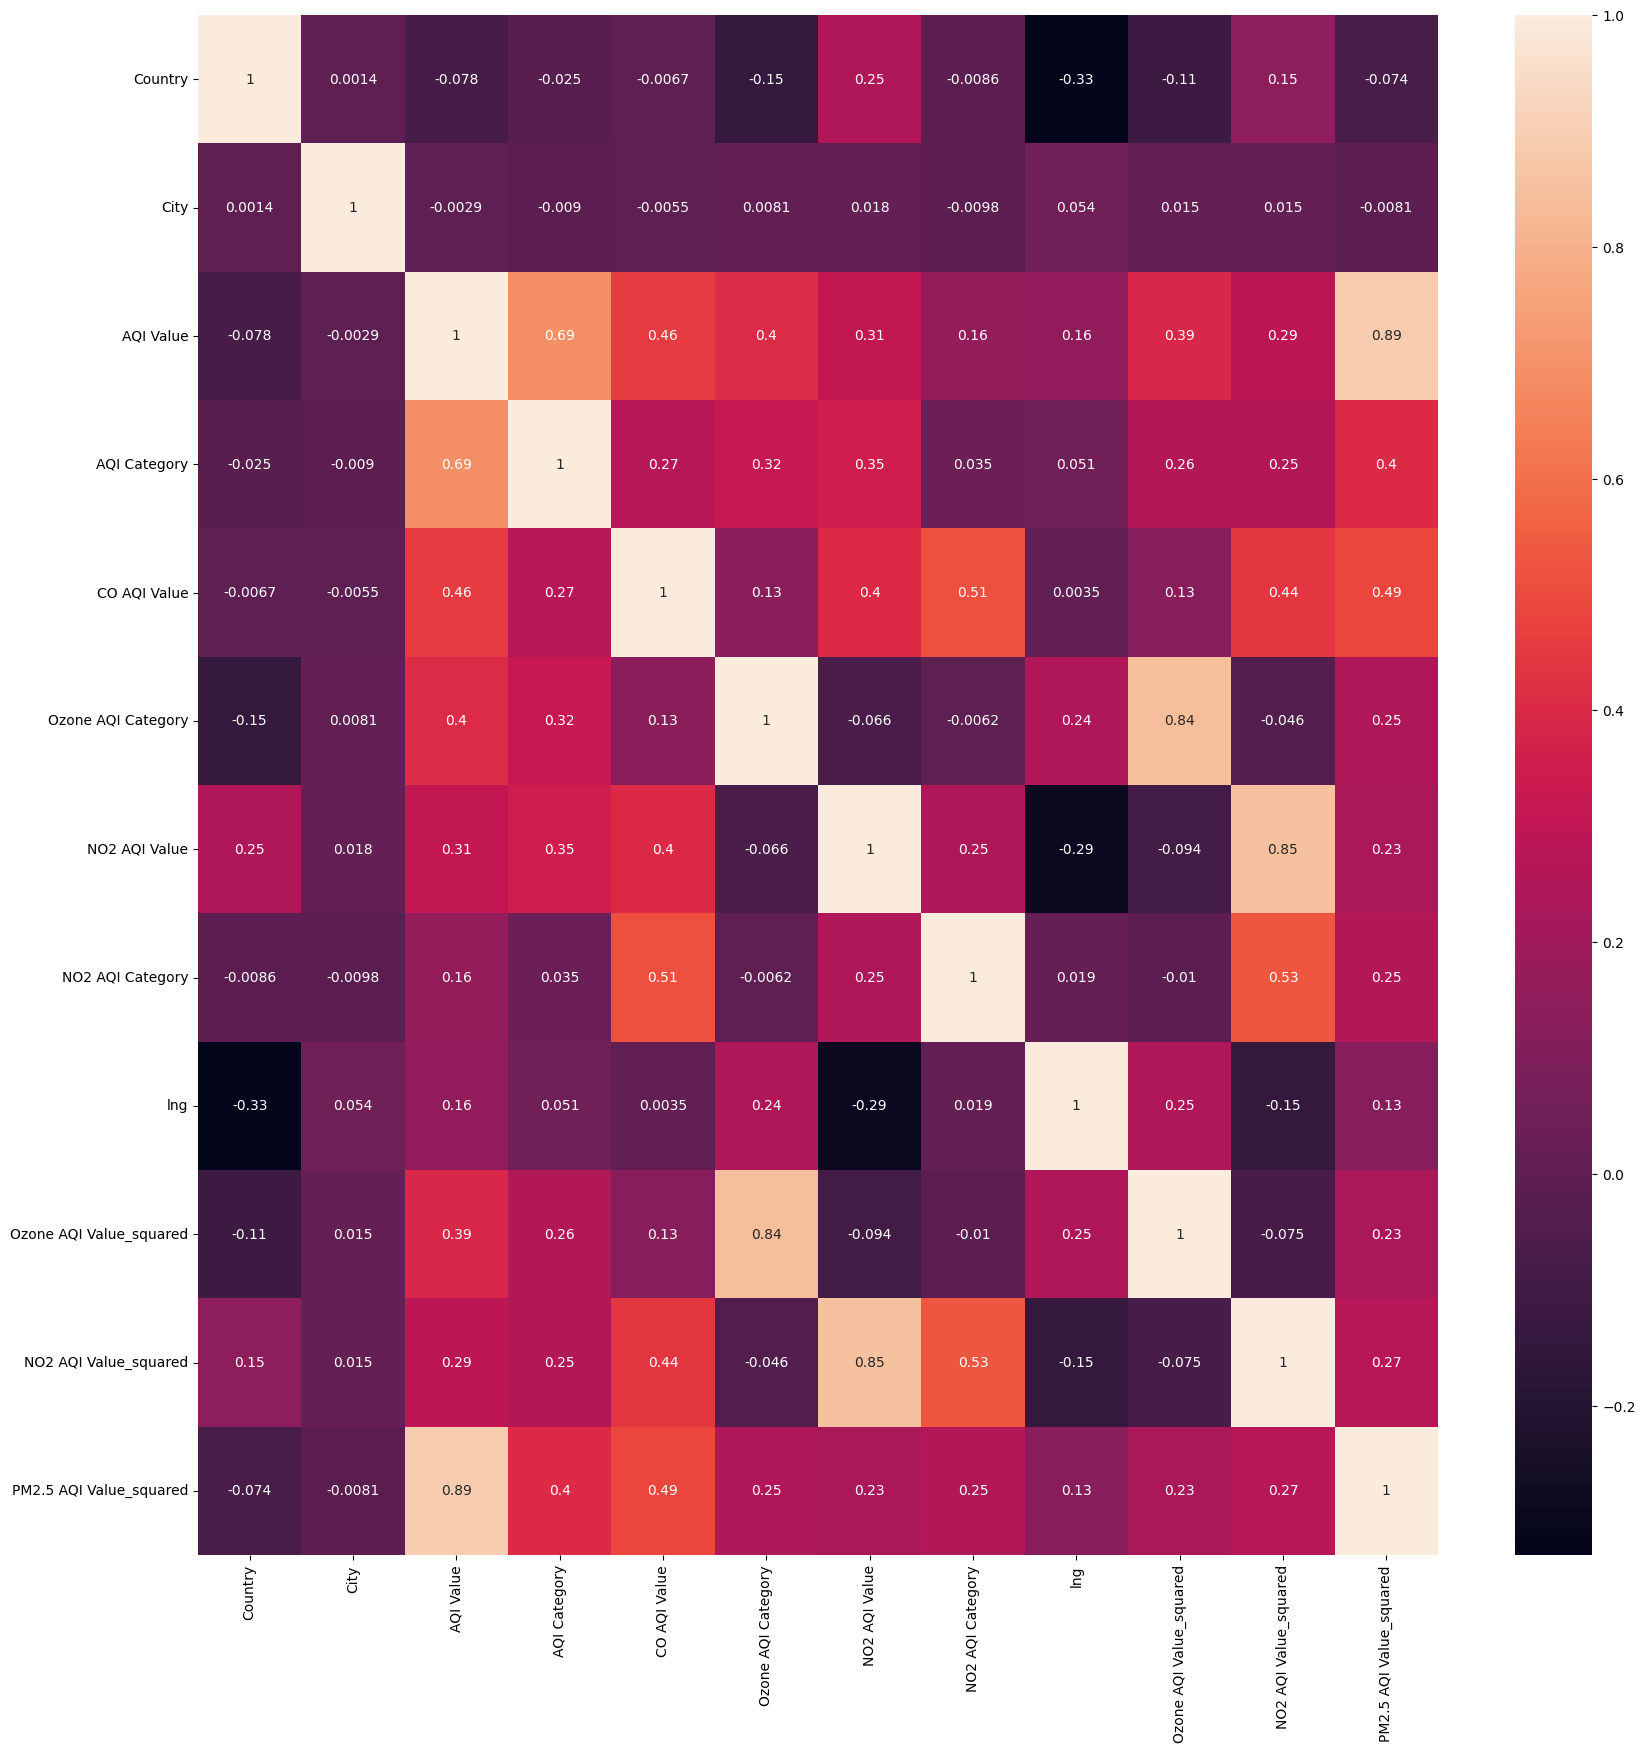

In [ ]:
corrmat = data_no.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
#plot heatmap
g = sns.heatmap(data_no[top_corr_features].corr(), annot= True)

[3.35963765e-04 1.29847727e-04 5.98286870e-01 3.58081869e-03
 3.87306581e-03 3.33473792e-04 2.35198964e-05 2.47095667e-04
 1.62510088e-02 3.26309137e-04 3.76612027e-01]


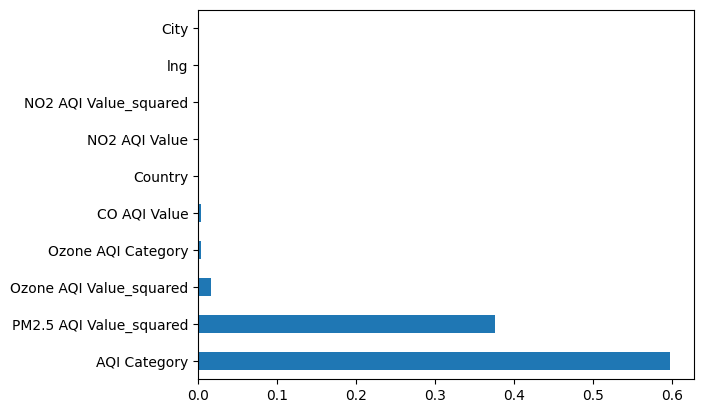

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import pandas as pd


model = ExtraTreesRegressor()
model.fit(X, y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [ ]:
target = 'AQI Value'
features = [col for col in data_h.columns if col != target]


In [ ]:
data_no.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'lng',
       'Ozone AQI Value_squared', 'NO2 AQI Value_squared',
       'PM2.5 AQI Value_squared'],
      dtype='object')

PartialDependencePlot progress: |

<ipython-input-202-22c8c5345050>:8: H2ODeprecationWarning: ``data`` param of ``ModelBase.partial_plot`` is deprecated, please use ``frame`` instead.
  pdp = automl.leader.partial_plot(data=data_h, cols=[feature], plot=True)


████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| 

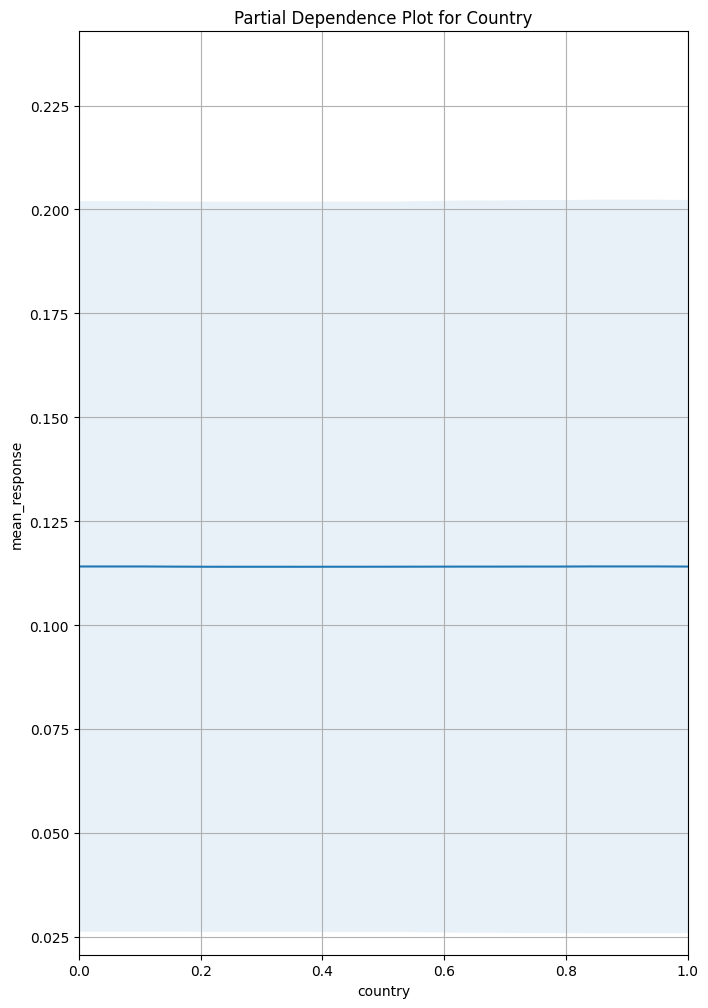

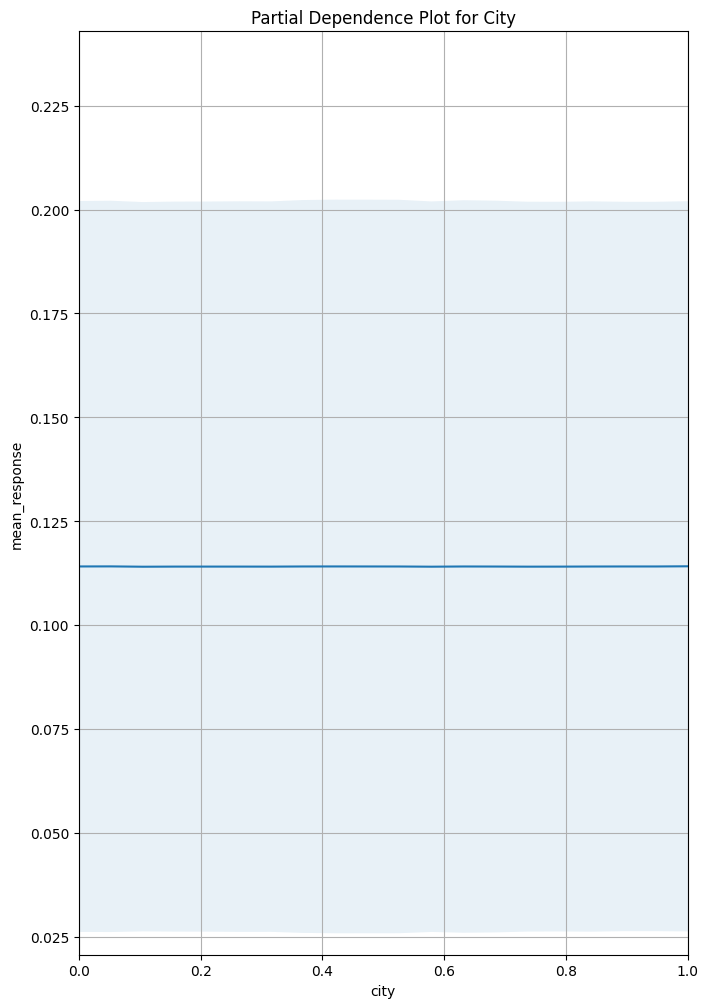

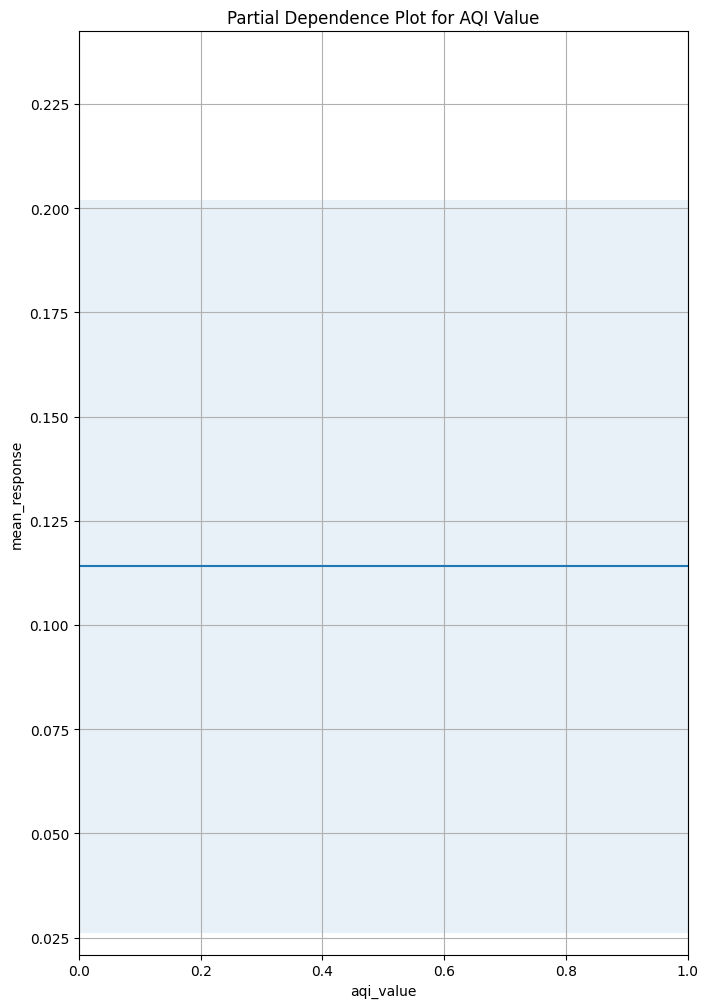

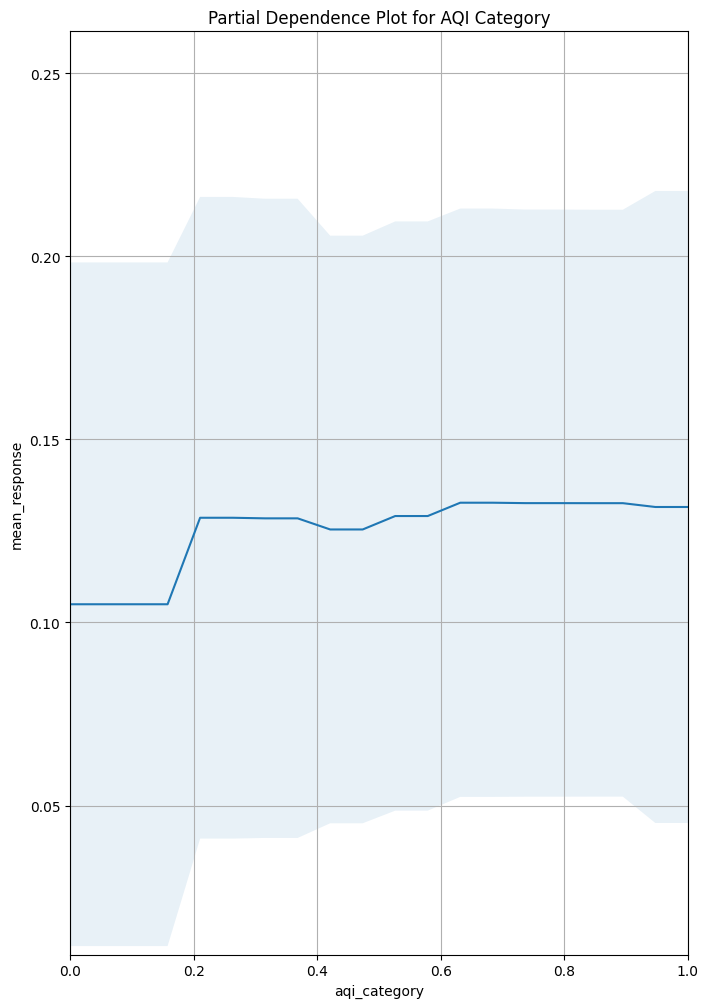

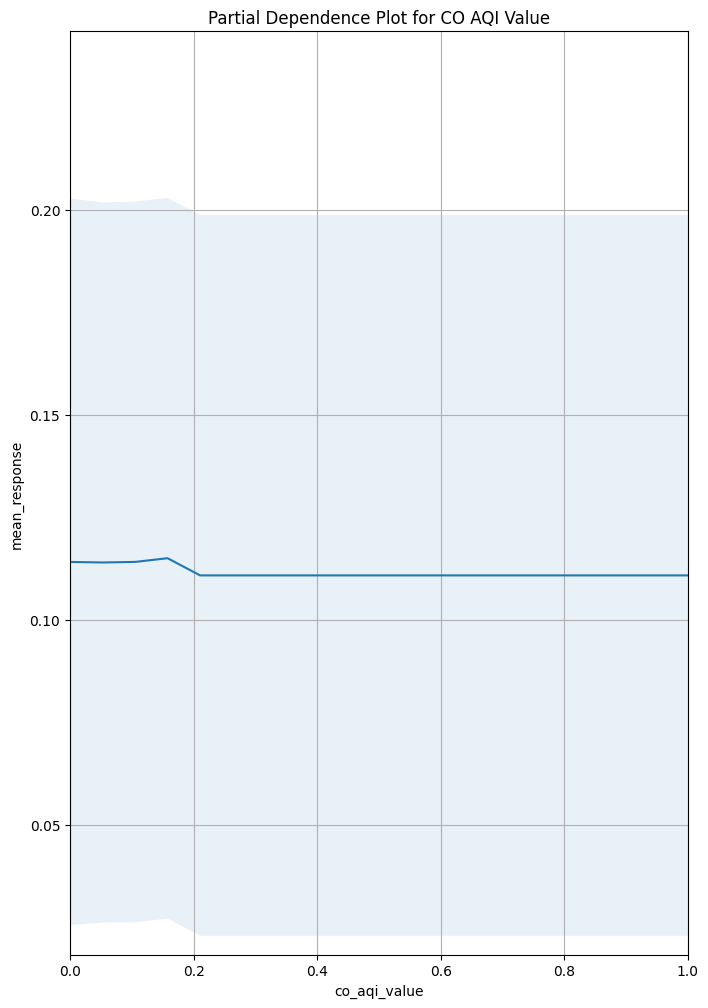

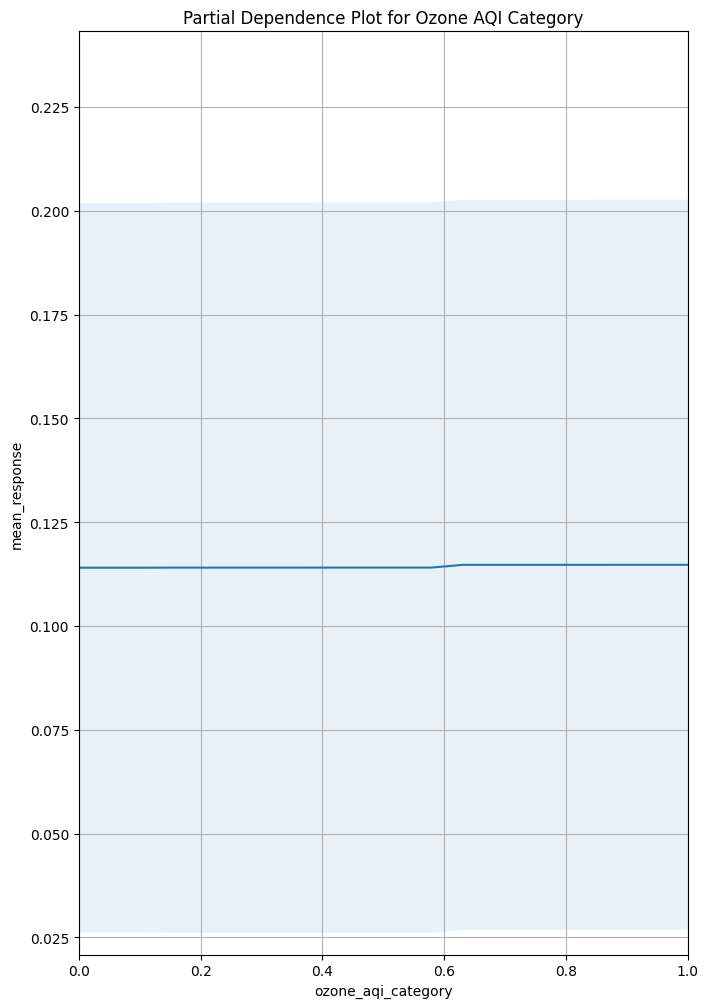

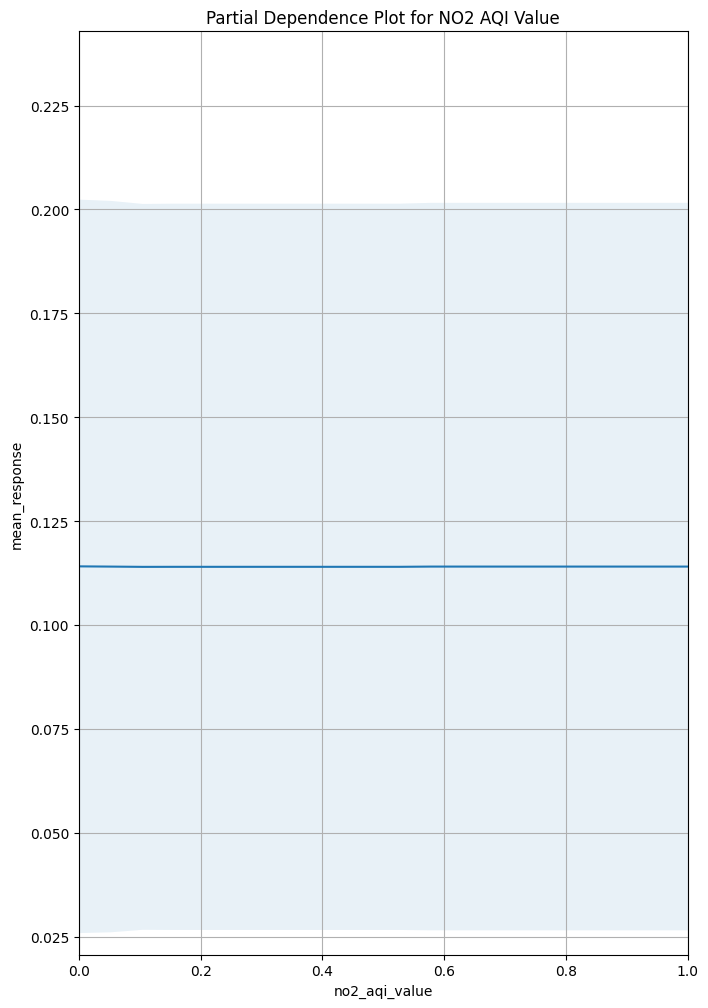

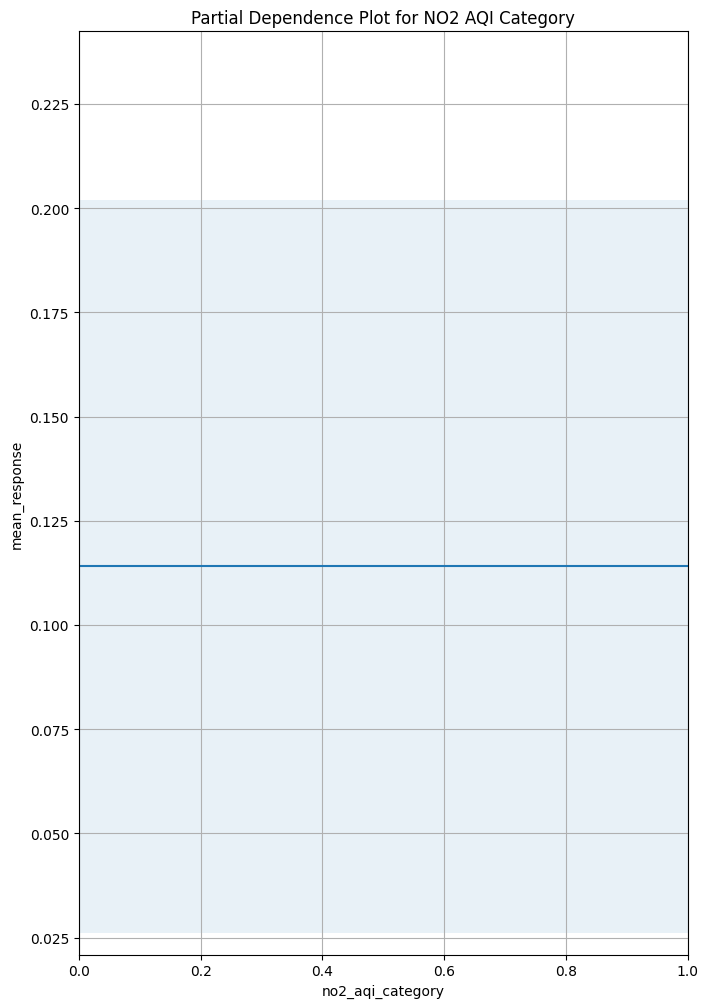

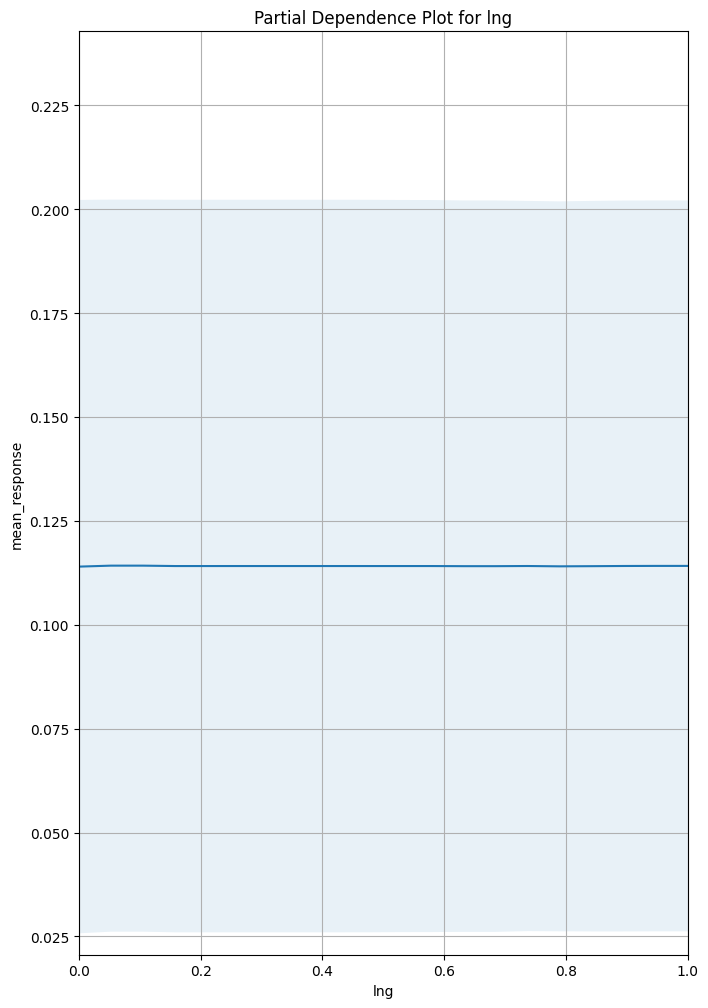

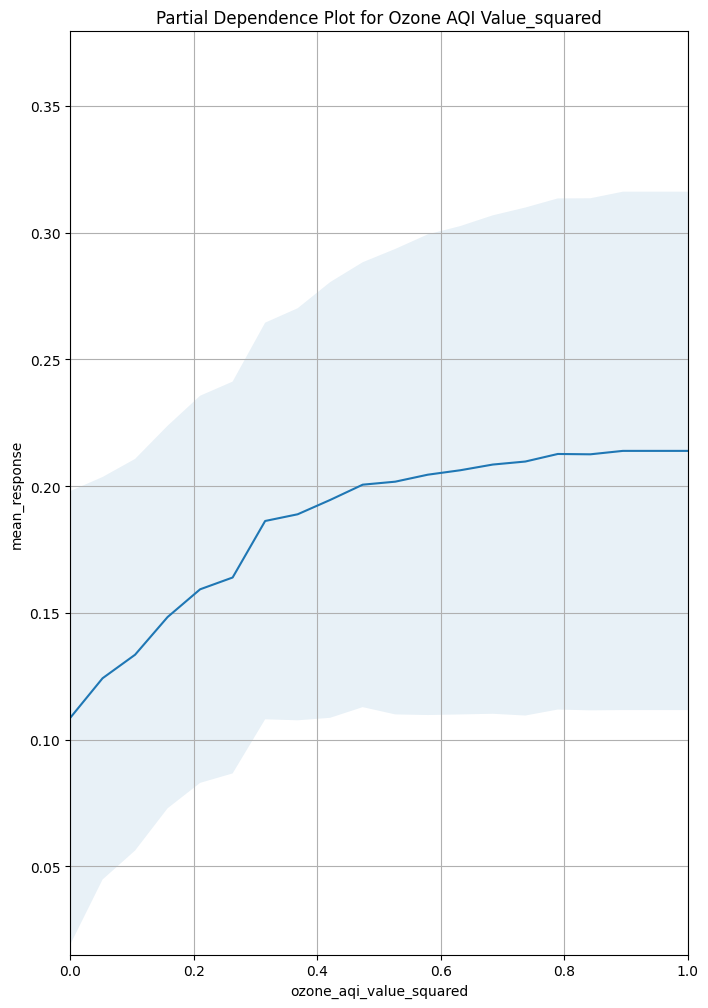

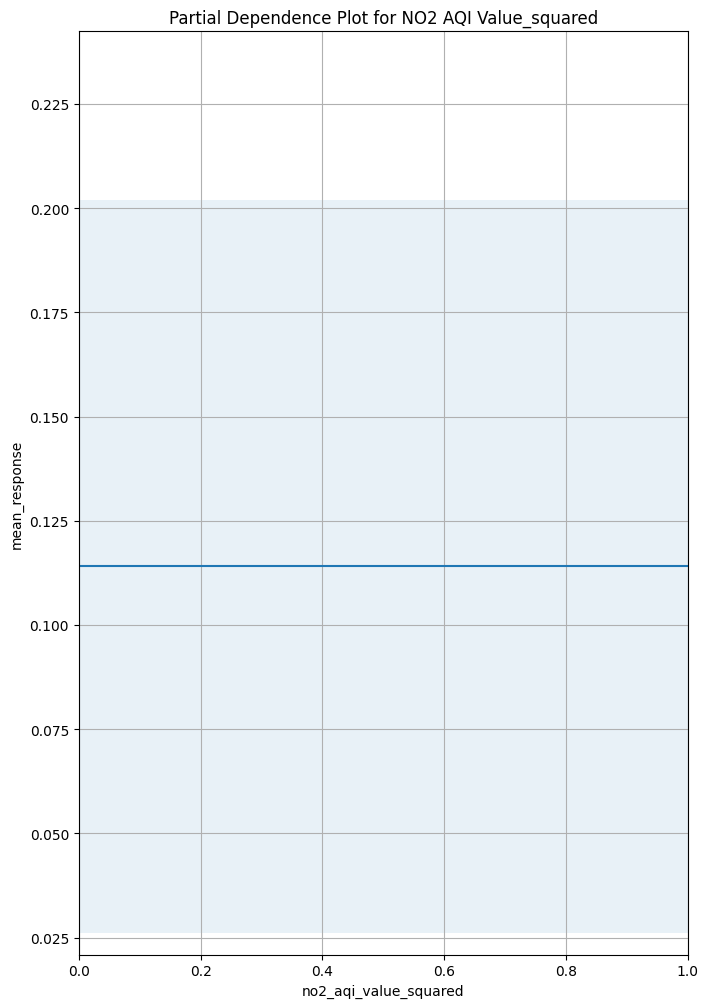

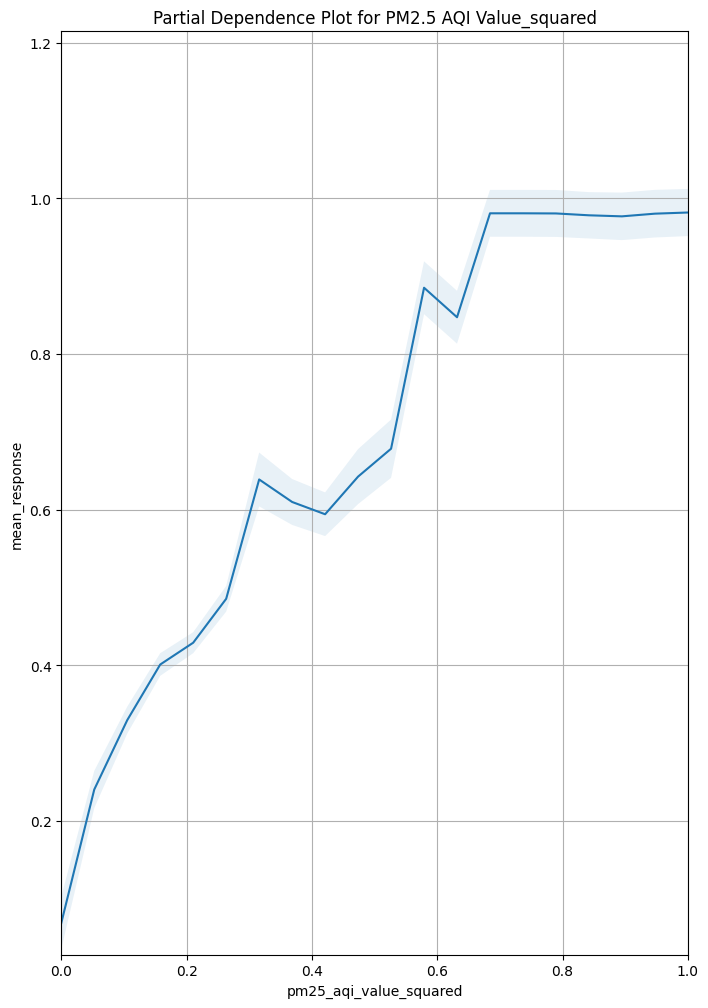

In [ ]:
feature_list = ['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'lng',
       'Ozone AQI Value_squared', 'NO2 AQI Value_squared',
       'PM2.5 AQI Value_squared']

# Generate partial plots
for feature in feature_list:
    pdp = automl.leader.partial_plot(data=data_h, cols=[feature], plot=True)


# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

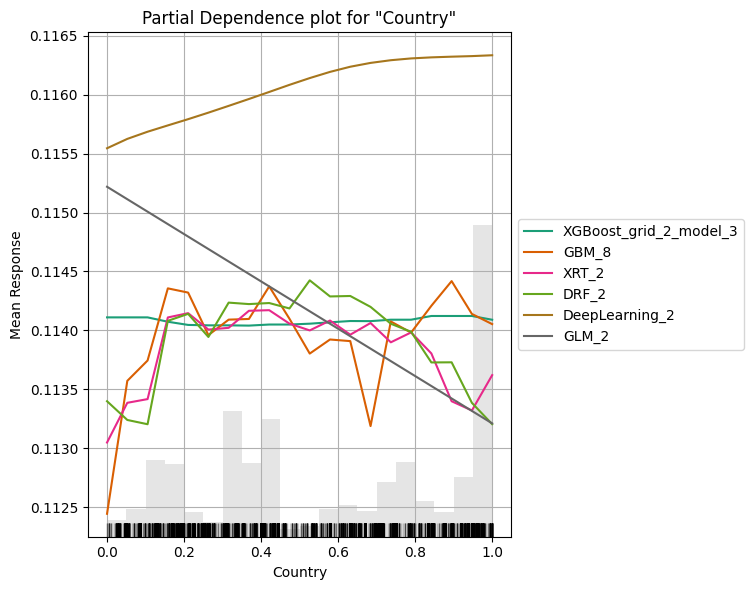

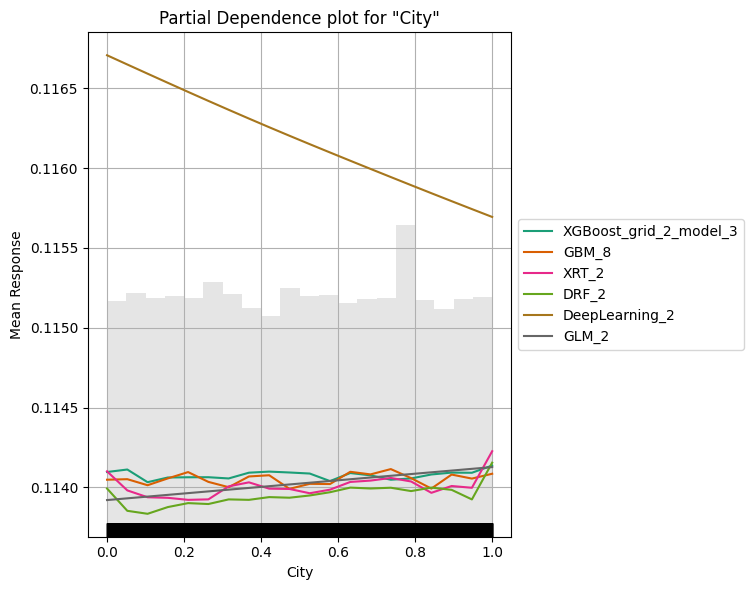

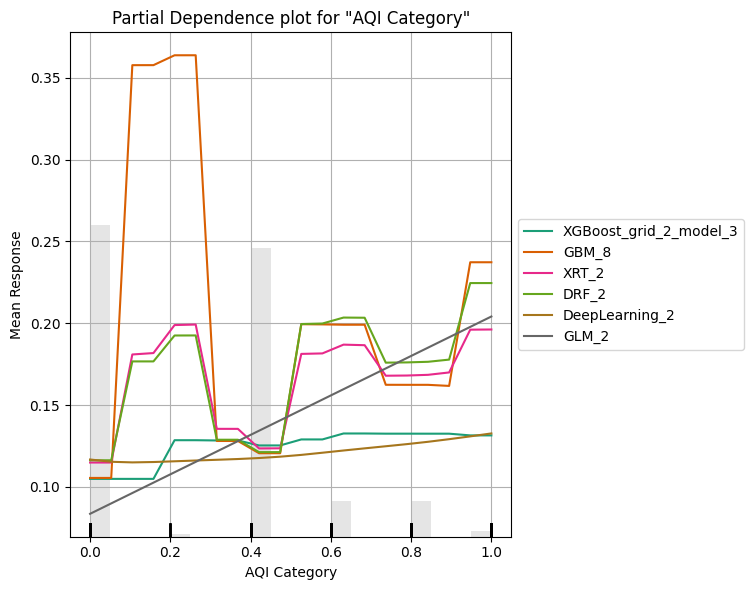

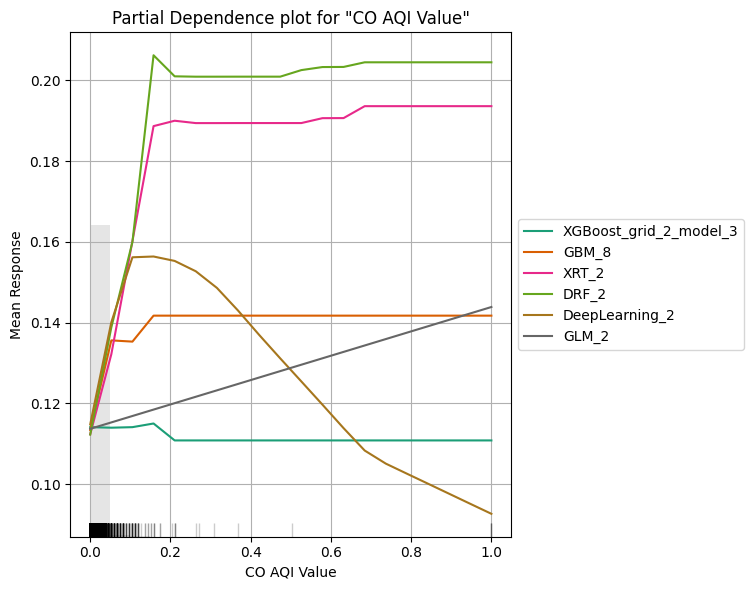

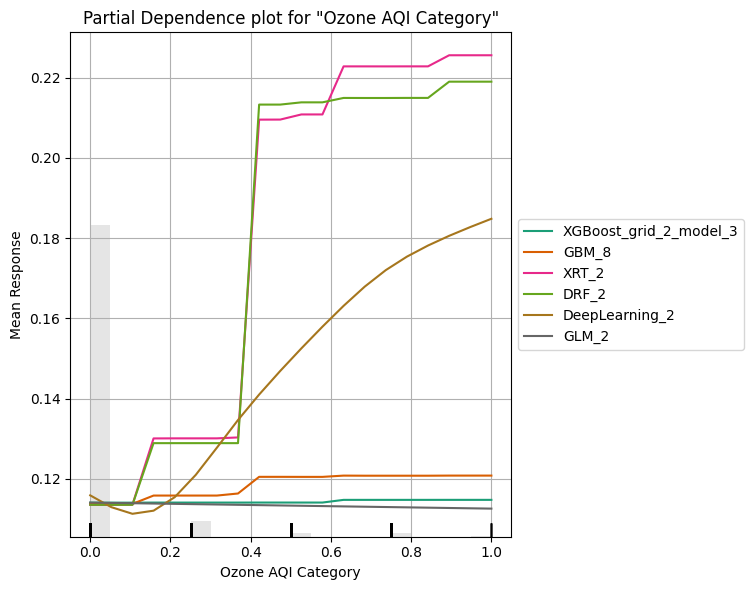

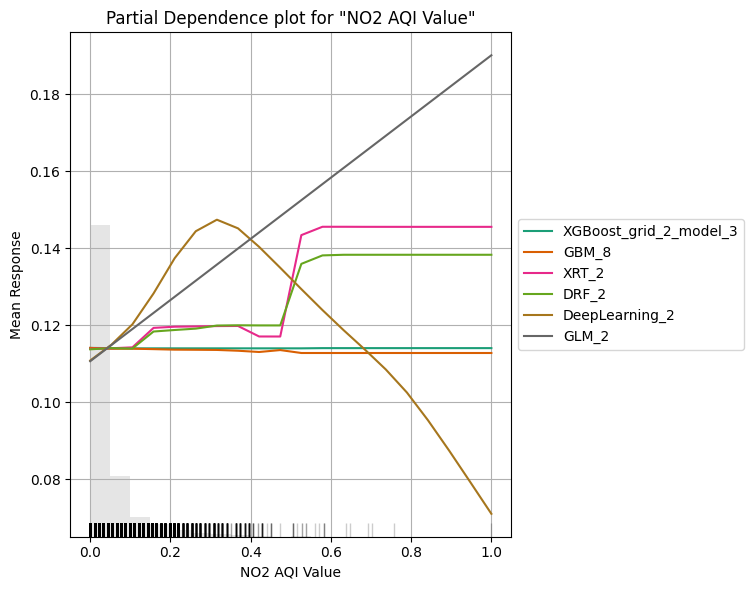

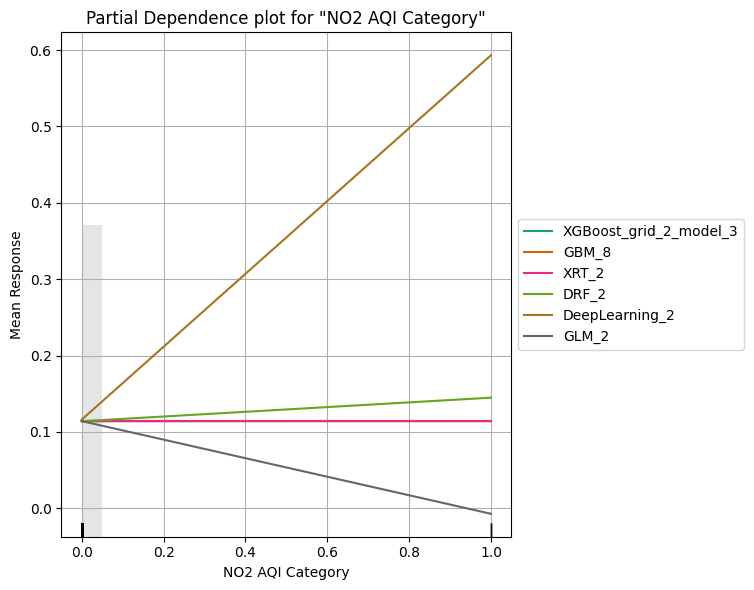

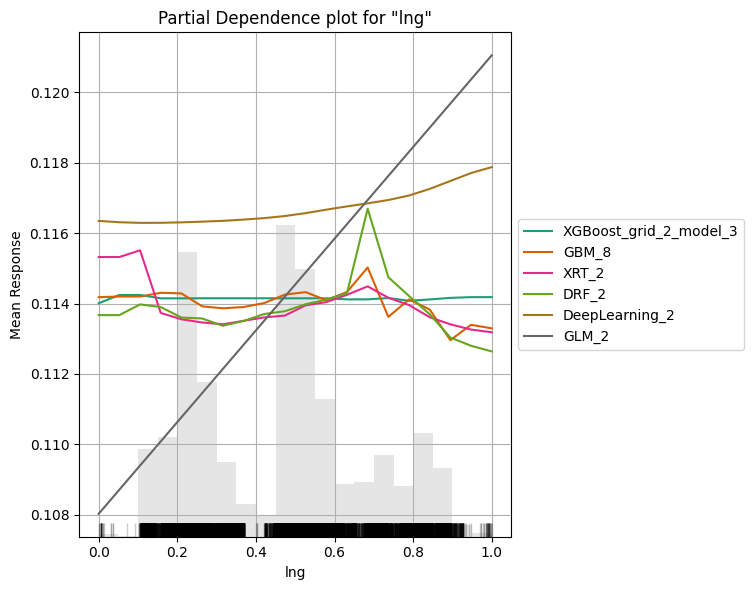

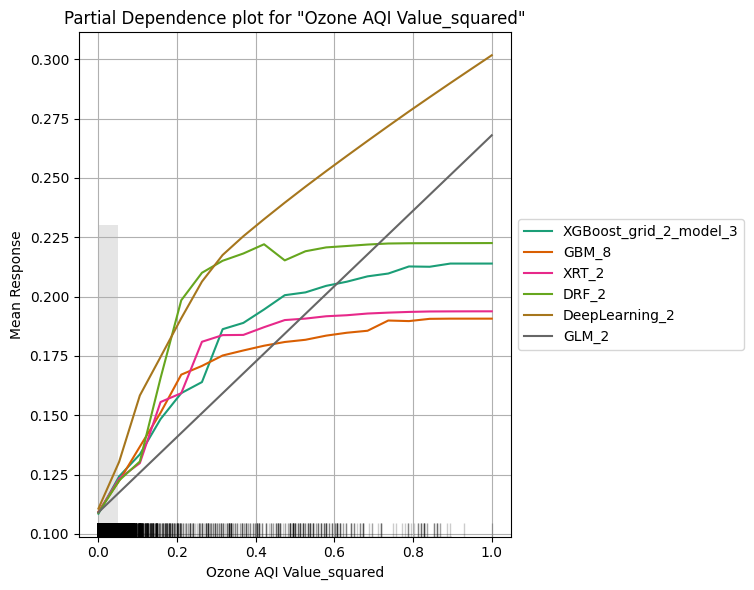

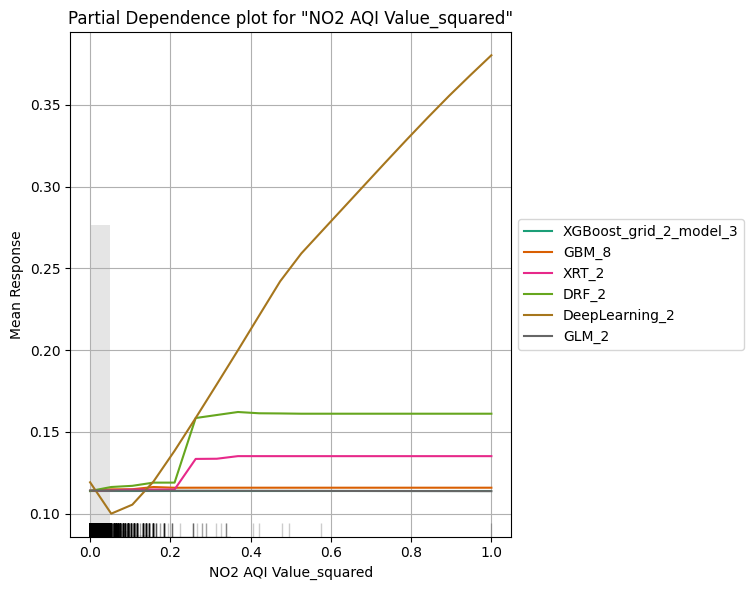

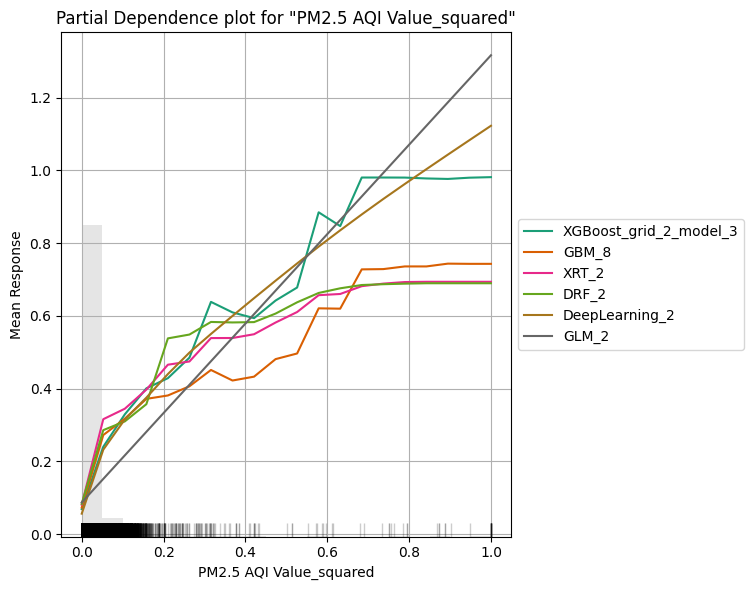

In [ ]:
explain_model = automl.explain(frame = data_h, figsize = (8,6),include_explanations=['pdp'])

# Which hyperparameters are important?

ntrees (n_estimators): Set to 63, suggesting a moderate number of trees were found to be optimal.

max_depth: Set to 6, indicating a balance between learning detailed patterns and preventing overfitting.

learning_rate (eta): Set to 0.3, which is relatively aggressive, allowing the model to learn faster.

min_child_weight: Set to 5.0, providing a way to prevent overfitting by making the model more conservative.

subsample: Set to 1.0, meaning no subsampling was used.

colsample_bytree: Also set to 1.0, indicating all features were used for each tree without subsampling.

reg_alpha and reg_lambda: Set to 0.001 and 0.1, respectively, adding some level of regularization to the model.

booster: Set to 'dart', showing that this particular type of boosting was chosen, which includes dropout regularization techniques.

These hyperparameters are critical to the model's ability to learn from the data effectively while preventing overfitting.

In [ ]:
best_model = automl.leader
best_model_params = best_model.params
display(best_model_params)

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_grid_2_AutoML_4_20240220_33057_model_3',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_grid_2_AutoML_4_20240220_33057_model_3'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_4_20240220_33057_training_Key_Frame__upload_a9d443d4500499c640fa5275ef5b4c94.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_4_20240220_33057_training_Key_Frame__upload_a9d443d4500499c640fa5275ef5b4c94.hex'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_4_20240220_33057_training_Key_Frame__upload_a9d443d4500499c640fa5275ef5b4c94.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_4_20240220_33057_training_Ke

# 10. Coding professionalism?

yes



# Conclusion
The model developed demonstrates a statistically significant relationship between several AQI-related predictors and the target variable, addressing initial concerns of non-linearity and heteroscedasticity through transformations and polynomial feature inclusion. Efforts to mitigate multicollinearity were evident, with final variable selection showing independence among predictors and a focus on the most impactful features, particularly those related to AQI values and categories. The use of an XGBoost model, fine-tuned through careful hyperparameter optimization, including n_estimators, max_depth, learning_rate, and regularization parameters, resulted in a robust predictive framework. This balance of complexity and generalization, alongside the strategic handling of multicollinearity and model assumptions, underscores the model's appropriateness and effectiveness for the given prediction task, with AQI-related features emerging as key determinants in the predictive analysis.

# References

1. https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

2. https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f

3. https://xgboost.readthedocs.io/en/stable/

4. https://www.nvidia.com/en-us/glossary/xgboost/

5. https://www.analyticsvidhya.com/blog/2022/02/a-comprehensive-guide-on-hyperparameter-tuning-and-its-techniques/

6. https://www.youtube.com/watch?v=OtD8wVaFm6E





MIT License

Copyright (c) 2024 Pranav Kharat

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.